In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

In [75]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Basic exploration of dataset

In [76]:
train.shape

(1460, 81)

In [77]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Dropping ID feature as it won't be useful

In [78]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [79]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Missing data 

There are some null values in the data that need to be explored and taken care of (in the later part of this project)

In [81]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


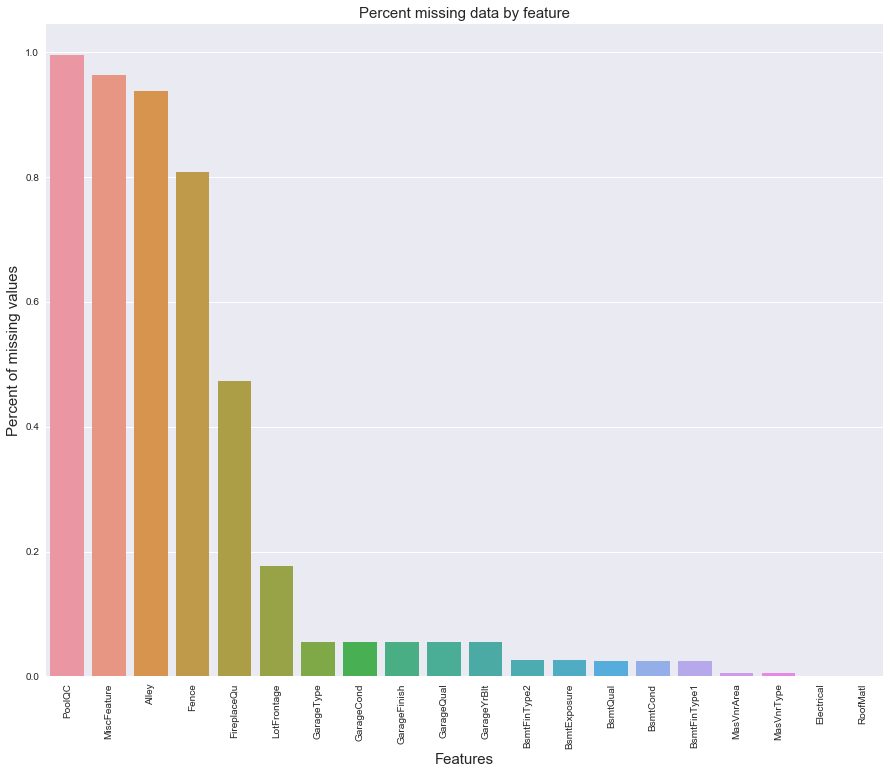

In [82]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total.index[:20], y=percent[:20])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### My decision is to drop 6 features that have over 15% of null values

In [83]:
train=train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1)
test=test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1)

In [84]:
test.shape

(1459, 73)

### Outliers

Documentation for the Ames Housing Data indicates that there are outliers present in the training data - we clearly see that two of them are out of trend and need to be deleted - they show large area sold cheaply

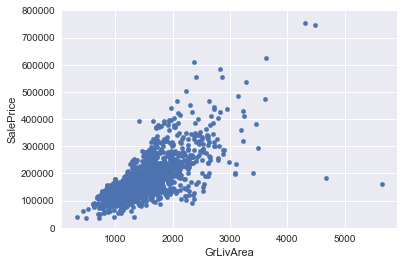

In [85]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

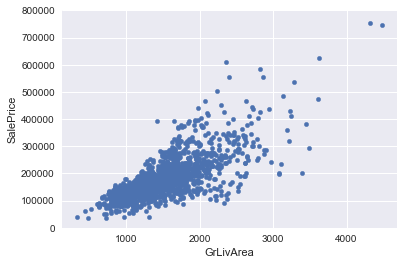

In [86]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Target value

Sale Price need to be explored and if possible transformed to normally distributed to make it a better fit for modeling

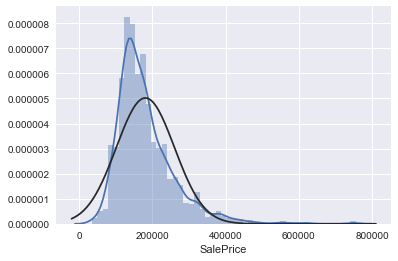

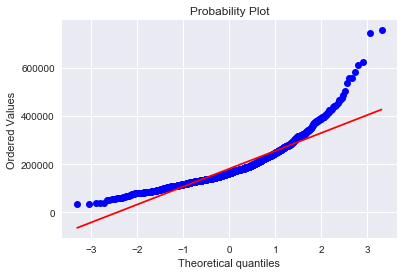

In [87]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

The distribution is right skewed - for the linear model we can transform it to be more normally distributed with log transformation

In [88]:
train['SalePrice'] = np.log(train['SalePrice'])

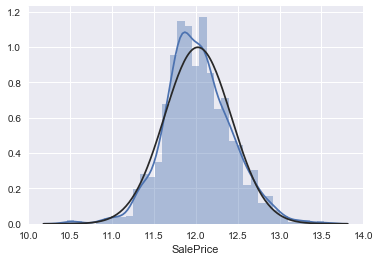

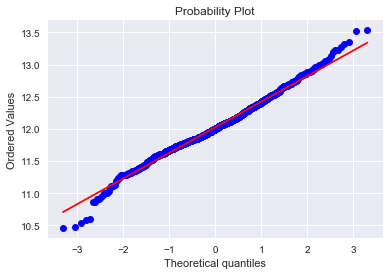

In [89]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

### Checking correlation between variables

Heatmap and table below show that the most correlated features are ones for overall quality, above grade (ground) living area square feet, related with garage, year built or remodeled and size of the house

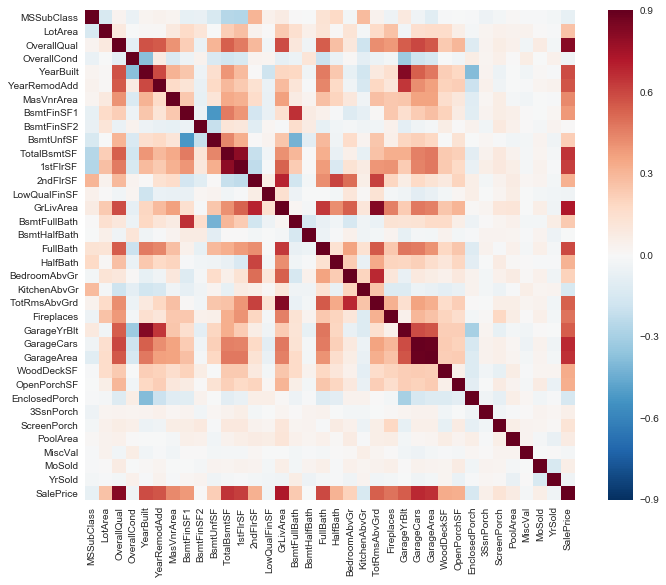

In [90]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [91]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.821404
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
GarageYrBlt      0.541638
TotRmsAbvGrd     0.537702
Fireplaces       0.491998
MasVnrArea       0.434620
BsmtFinSF1       0.392283
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
ScreenPorch      0.121245
PoolArea         0.074338
MoSold           0.057064
3SsnPorch        0.054914
BsmtFinSF2       0.004863
BsmtHalfBath    -0.005124
MiscVal         -0.020012
OverallCond     -0.036821
YrSold          -0.037151
LowQualFinSF    -0.037951
MSSubClass      -0.073969
KitchenAbvGr    -0.147534
EnclosedPorch   -0.149029
Name: SalePrice, dtype: float64

Concatenation of data for easier processing of missing values (remembering the split with ntrain and ntest), dropping SalePrice, as this is the target value

In [92]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 73)


### Taking care of missing values

GarageType, GarageFinish, GarageQual and GarageCond - no data, replacing with None

In [93]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars - no data means no Garage, replacing with 0

In [94]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 - no data means no Basement, replacing with 0

In [95]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna(0)

MasVnrArea and MasVnrType - no data means no masonry veneer for these houses, replacing area with 0 and type with None

In [96]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna('None')

MSZoning: replacing with 'RL', the most common value

In [97]:
pd.crosstab(index=train['MSZoning'],columns='count')

col_0,count
MSZoning,
C (all),10
FV,65
RH,16
RL,1149
RM,218


In [98]:
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')

Utilities : replacing with 'AllPub', the most common value.

In [99]:
pd.crosstab(index=test['Utilities'],columns='count')

col_0,count
Utilities,
AllPub,1457


In [100]:
all_data["Utilities"] = all_data["Utilities"].fillna("AllPub")

Functional : data description says NA means typical

In [101]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Electrical : replacing with 'SBrkr', the most common value.

In [102]:
pd.crosstab(index=train['Electrical'],columns='count')

col_0,count
Electrical,
FuseA,94
FuseF,27
FuseP,3
Mix,1
SBrkr,1332


In [103]:
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

KitchenQual : replacing with 'TA', the most common value.

In [104]:
pd.crosstab(index=train['KitchenQual'],columns='count')

col_0,count
KitchenQual,
Ex,98
Fa,39
Gd,586
TA,735


In [105]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')

Exterior1st and Exterior2nd: replacing with 'VinylSd', the most common value.

In [106]:
pd.crosstab(index=train['Exterior1st'],columns='count')
#pd.crosstab(index=train['Exterior2nd'],columns='count')

col_0,count
Exterior1st,
AsbShng,20
AsphShn,1
BrkComm,2
BrkFace,50
CBlock,1
CemntBd,60
HdBoard,222
ImStucc,1
MetalSd,220


In [107]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

SaleType: replacing with 'WD', the most common value.

In [108]:
pd.crosstab(index=train['SaleType'],columns='count')

col_0,count
SaleType,
COD,43
CWD,4
Con,2
ConLD,9
ConLI,5
ConLw,5
New,120
Oth,3
WD,1267


In [109]:
all_data['SaleType'] = all_data['SaleType'].fillna('WD')

In [110]:
all_data.shape

(2917, 73)

## Further transformation

Some numerical features should be transformed to categorical as they mean category rather than value

In [111]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Using LabelEncoder for categorical data preprocessing

In [112]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

       
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 73)


Adding total sqfootage feature as it seems to be highly correlated value 

In [113]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Check the skew of all numerical features

In [114]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


### Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation. This will give better results with ML algorithms

In [115]:
skewness = skewness[abs(skewness) > 0.5]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

Dummy encoding rest of categorical features

In [116]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 213)


Splitting the data back

In [117]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Modeling

In [118]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

Searching for the best parameters for models I want to use with GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV

model = Lasso()

parameters = {'alpha': [1.0,0.1,0.001,0.0007,0.0005,0.0003,0.0001], 
             }


grid_obj = GridSearchCV(model, parameters)
grid_obj = grid_obj.fit(train, y_train)

grid_obj.best_params_

{'alpha': 0.0003}

In [120]:
modelE = ElasticNet()

parameters = {'alpha': [1.0,0.1,0.001,0.0007,0.0005],
              'l1_ratio':[0.9,0.8,0.7,0.6,0.5,0.4]
             }


grid_obj = GridSearchCV(modelE, parameters)
grid_obj = grid_obj.fit(train, y_train)

grid_obj.best_params_

{'alpha': 0.0007, 'l1_ratio': 0.5}

In [121]:
modelE = KernelRidge()

parameters = {'alpha': [0.9,0.8,0.7,0.6,0.5],
              'kernel':['polynomial'],
              'degree':[1,2,3,4],
              'coef0':[2.0,2.5,3.0]
             }


grid_obj = GridSearchCV(modelE, parameters)
grid_obj = grid_obj.fit(train, y_train)

grid_obj.best_params_

{'alpha': 0.9, 'coef0': 3.0, 'degree': 2, 'kernel': 'polynomial'}

Validating and choosing the best model

In [122]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [123]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0003, random_state=1))

In [124]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0007, l1_ratio=0.5, random_state=3))

In [125]:
KRR = KernelRidge(alpha=0.9, kernel='polynomial', degree=2, coef0=3.0)

In [126]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1114 (0.0076)



In [127]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1110 (0.0075)



In [128]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1141 (0.0071)



Elastic Net and Lasso seem to work well, they should be checked for best submission

In [129]:
clf_lasso=Lasso(alpha =0.0003)
clf_lasso.fit(train, y_train)

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
lasso_preds = np.expm1(clf_lasso.predict(test))

In [131]:
clf_ENet=ElasticNet(alpha=0.0007, l1_ratio=0.5, random_state=3)
clf_ENet.fit(train, y_train)

ElasticNet(alpha=0.0007, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
ENet_preds=np.expm1(clf_ENet.predict(test))

In [133]:
solution = pd.DataFrame({"id":test_ID, "SalePrice":ENet_preds})
solution.to_csv("solution_e.csv", index = False)

This submission gets 0.12231 on Kaggle. Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)